20213043 이세현
데이터과학 기말고사

# 문제 1

터널 [2, 3, 5, 2, 3] 크기 51
스카 [2, 4, ?, 2, 4]
보이 [5,  , 4, 2, 3] 63
식샤 [5, 4, 1, 3, 2] 55
이태 [2, 4, 3, 5, 1] 55
평균 []

In [103]:
0.0869 + 13/4

3.3369

In [97]:
import numpy as np
te = np.array([2,3,5,2,3] )
sk = np.array([2,4,3,2,4])

ii = np.array([2,4,3,5,1])

print(te@sk / 51 / 49)
print(ii @ sk / 55 / 49)

0.01880752300920368
0.01595547309833024


# 문제 2

In [4]:
import pickle
with open('final_dataset1.pkl', 'rb') as f:
    data = pickle.load(f)

print(data)
print(data.shape) # 10차원 6051열

[[ -6.98014473 -18.2908817   18.09557828 ...   8.3359867   -0.56491365
   -7.08724994]
 [ -4.05364609 -17.50454449  18.55273302 ...   9.90436772  -0.13285703
   -7.46557304]
 [ -5.74706393 -18.44996943  19.20210158 ...   8.8097579   -1.63668289
   -6.5988951 ]
 ...
 [-15.20225643   2.24767606  -3.32242499 ...  -6.65137087  -1.67164526
   -0.54716911]
 [-16.02328262  -2.21858025  -2.87626273 ...  -7.30105113  -2.91024724
   -1.75556999]
 [-15.68923293   0.68928695  -3.67467434 ...  -7.42449685  -1.28683579
    0.27013633]]
(6051, 10)


/tmp/ipykernel_3763/2646755098.py:41: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


TypeError: Axes.scatter() got multiple values for argument 's'

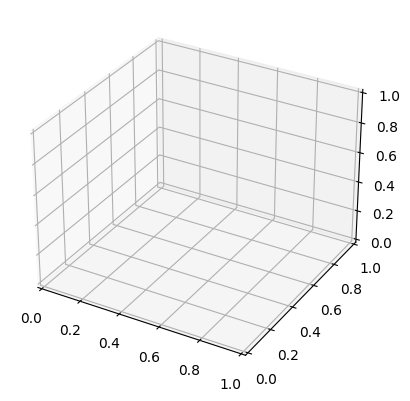

In [66]:
import random
import numpy as np
import matplotlib.pyplot as plt

def assign(point, centroids, k):
    return min(range(k), key=lambda i: np.dot(centroids[i]-point, centroids[i]-point))

def compute_centroids(assignments, points, k):
    vec_sum = [np.zeros(len(points[0])) for _ in range(k)]
    counts = [0] * k

    for i, p in zip(assignments, points):
        vec_sum[i] += p
        counts[i] += 1

    return [vec_sum[i]/counts[i] if counts[i] > 0 else random.choice(points) for i in range(k)]

def kmeans(k, points):
    prev_assignment = []

    centroids = points[np.random.choice(points.shape[0], replace=False, size=k)]

    for epoch in range(10):
        assignment = [assign(p, centroids, k) for p in points]
        centroids = compute_centroids(assignment, points, k)

        if prev_assignment == assignment:
            break
        prev_assignment = assignment
    
    return assignment, centroids

k = 10
points = [np.random.randn(k) for _ in range(6051)]
points = np.array(points)
assignments, centroids = kmeans(k, points)



fig = plt.figure()
ax = fig.gca(projection='3d')

clusters = [[] for _ in range(k)]
for a, p in zip(assignments, points):
    clusters[a].append(p)


for cluster in clusters:
    ax.scatter(*zip(*cluster))

ax.scatter(*zip(*centroids), s=100)
# plt.show()    

In [67]:
print(len(assignments))

6051


# 문제 PCA

In [68]:
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

X = []
for i in range(6051):
    X.append((np.ndarray.tolist(data[i]), assignments[i]))

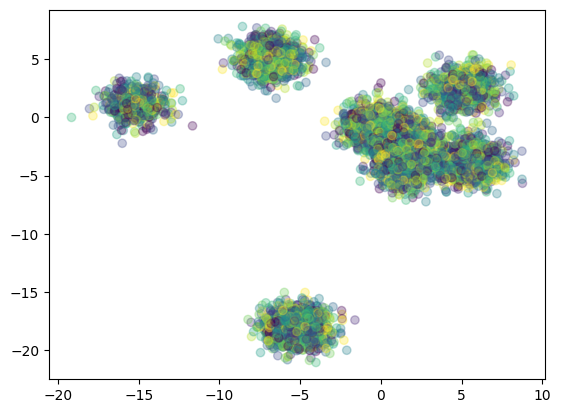

In [69]:
plt.scatter([d[0][0] for d in X], [d[0][1] for d in X], c=[d[1] for d in X], alpha=0.3)
plt.show()

[1, 2, 3]

[2, 3, 4] ]

...

평균: [0, 0, 0]

PC1 = [2, 1, 2]와 방향 동일

3, 3, 9를 2, 1, 2로 사영
a를 b로 사영
ba / bb * b
ba = [2,1,2] * [3,3,9] = 6 + 3 + 18 = 29
bb = [2,1,2] * [2,1,2] = 4 + 1 + 4 = 9
29/9 * [2,1,2]


a [0 0 0.5 0 0]
b [1 1 0 0 0]
c [0 0 0 1 0]
d [0 0 0 0 1]
e [0 0 0.5 0 0]



GoogleMatrix

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import requests

In [77]:
nodes = np.array(["a", "b", "c", "d", "e"])
num_nodes = nodes.shape[0]

edges = np.array([[0, 1], [1, 1], [2, 0], [2,4], [3,2], [4,3]])
num_edges = edges.shape[0] + 1
edges

array([[0, 1],
       [1, 1],
       [2, 0],
       [2, 4],
       [3, 2],
       [4, 3]])

In [79]:
def pagerank(edges, beta, threshold=10^20, epochs=2):
    neighbors = [[] for _ in range(num_nodes)]

    for e in edges:
        neighbors[e[0]].append(e[1])

    r = [1/num_nodes] * num_nodes

    for epoch in range(epochs):
        r_next = [0] * num_nodes

        for u in range(num_nodes):
            for v in neighbors[u]:
                r_next[v] += (1-beta) * r[u] / len(neighbors[u])

        r_sum = sum(r_next)
        for u in range(num_nodes):
            r_next[u] /= r_sum
        
        delta = sum(abs(a-b) for a, b in zip(r, r_next))

        r = r_next
        if delta < threshold:
            break
    return r

r = pagerank(edges, 0.8)
for score, node in sorted(zip(r, nodes), reverse=True)[:10]:
    print(f"({score:.6f}) {node}")

(0.400000) b
(0.200000) d
(0.200000) c
(0.100000) e
(0.100000) a


In [86]:
M = np.array([[0, 0, 0.5, 0, 0], [1, 1, 0, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1], [0, 0, 0.5, 0, 0]])
M

array([[0. , 0. , 0.5, 0. , 0. ],
       [1. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0.5, 0. , 0. ]])

In [87]:
N = np.array([[0.2, 0.2, 0.2, 0.2, 0.2],[0.2, 0.2, 0.2, 0.2, 0.2],[0.2, 0.2, 0.2, 0.2, 0.2],[0.2, 0.2, 0.2, 0.2, 0.2],[0.2, 0.2, 0.2, 0.2, 0.2]])
N

array([[0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2]])

In [88]:
A = 0.8 * M + 0.2 * N
A

array([[0.04, 0.04, 0.44, 0.04, 0.04],
       [0.84, 0.84, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.84, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.84],
       [0.04, 0.04, 0.44, 0.04, 0.04]])

Power iteration

In [89]:
M = np.array([[0, 0, 0.5, 0, 0], [1, 1, 0, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1], [0, 0, 0.5, 0, 0]])
N = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
N = M * N
N

array([[0. , 0. , 0.1, 0. , 0. ],
       [0.2, 0.2, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.2, 0. ],
       [0. , 0. , 0. , 0. , 0.2],
       [0. , 0. , 0.1, 0. , 0. ]])

In [90]:
N = M * N
N

array([[0.  , 0.  , 0.05, 0.  , 0.  ],
       [0.2 , 0.2 , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.2 , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.2 ],
       [0.  , 0.  , 0.05, 0.  , 0.  ]])